# Jordan Notebook - Machine Learning

- Author: [Jordan](https://github.com/JfromNWMS/)
- Repository: [datafun-07-ml](https://github.com/JfromNWMS/datafun-07-ml)

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.linear_model import Lars, LassoLars, BayesianRidge
from sklearn.model_selection import KFold, cross_val_score
import ipywidgets as widgets
from IPython.display import display

## Part 1 - Chart a Straight Line

### Section 1 - Data Acquisition

To begin, we will create a function to convert Fahrenheit to Celsius and allocate a dataframe  whose columns 
are temperature in Fahrenheit and the corresponding temperature in Celsius.

In [2]:
c = lambda f: 5/9*(f-32)
temps = [(f, c(f)) for f in range(0,101,10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

### Section 2 - Visualization

Now we plot Celsius vs. Farhenheit to see their linear relationship.

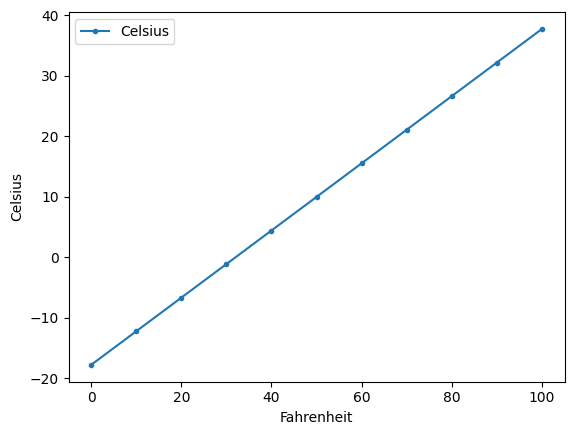

In [3]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')
plt.show()

## Part 2 - Prediction

### Section 1 - Data Acquisition

We begin by loading our data into a dataframe.

In [4]:
nyc_df = pd.read_csv("data/ave_hi_nyc_jan_1895-2018.csv")

### Section 2 - Data Inspection

Let's take a look at the head and tail of our dataframe.

In [5]:
display(nyc_df.head())
nyc_df.tail()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

Now we will rename our ‘Value’ column to ‘Temperature’ and remove the month from our date fields to yield the 
year for date.

In [6]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.Date = nyc_df.Date.floordiv(100)

### Section 4 - Descriptive Statistics

Let's take a look at the summary statistics of the columns of our dataframe.

In [7]:
pd.set_option('display.precision', 2)
nyc_df.describe()

,Date,Temperature,Anomaly
count,124.00,124.00,124.00
mean,1956.50,37.60,0.20
std,35.94,4.54,4.54
min,1895.00,26.10,-11.30
25%,1925.75,34.58,-2.82
50%,1956.50,37.60,0.20
75%,1987.25,40.60,3.20
max,2018.00,47.60,10.20


### Section 5 - Build the Model

Utilizing SciPy's linregress function we will fit a regression line for our 'Date' and 'Temperature' data,
then we can view our regression line's slope and intercept.

In [8]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
display(linear_regression.slope.item())
linear_regression.intercept.item()

0.014771361132966163

8.694993233674289

### Section 6 - Predict

With our regression lines slope and intercept we can predict the average high temperature for January 2024.

In [9]:
(linear_regression.slope*2024 + linear_regression.intercept).item()

38.5922281667978

### Section 7 - Visualizations

With Seaborn's regplot() we can view a scatterplot of our data with a fit regression line.

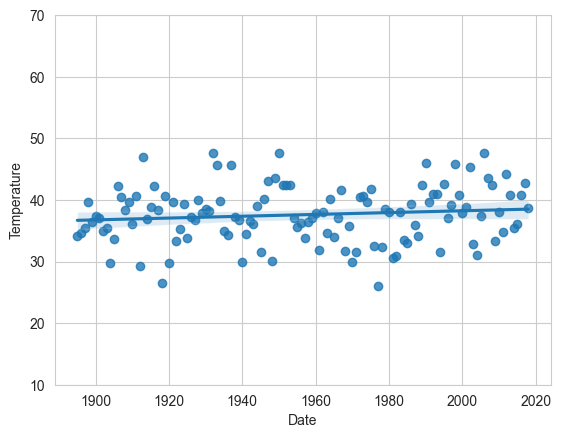

In [10]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10,70)
plt.show()

## Part 3 - Prediction

### Section 1 - Build the Model

With linear regression in mind we split our dataset into training and testing sets by the 75% and 25% default distributions of train_test_split().

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1,1), nyc_df.Temperature.values,
    random_state=11)

display(X_train.shape)
X_test.shape

(93, 1)

(31, 1)

Now we use Scikit-Learn's function for multiple linear regression to fit our date and temperature data and then display the slope and intercept of the fitted line. 

In [12]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

display(linear_regression.coef_.item())
linear_regression.intercept_.item()

0.019391673294782773

-0.30779820252656975

### Section 2 - Test the Model

Let's test our model using every fifth element of our test data by having a look at their predicted vs. expected values. 

In [13]:
predicted = linear_regression.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

Using the slope and intercept of the regression line fit to our training data we can again predict the average high temperature in January 2024.

In [14]:
predict = (lambda x: linear_regression.coef_ * x +
           linear_regression.intercept_)
predict(2024).item()

38.94094854611376

### Section 4 - Visualizations

We now have a look at a scatterplot of all our date and temperature data with a regression line fit to our training data.

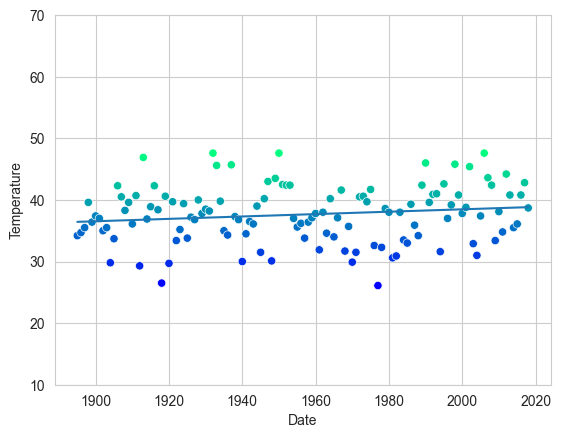

In [15]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
    hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10,70)
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x,y)
plt.show()

## Part 4 - Method Comparison

Both methods of fitting a linear regression model to our dataset utilize the same simple linear regression model, ordinary least squares regression.  Our first model was fit by utilizing all observations of our dataset while our second model was fit on a training set.  The prediction for high average temperature for January 2024 differed little between the models with the model fit from the entire dataset yielding 38.59 degrees and the model fit on the training data yielding 38.94 degrees.

## Part 5 - Bonus

### Section 1 - Data Aquisition

In [16]:
california = fetch_california_housing()
california_df: pd.DataFrame = pd.DataFrame(california.data, columns = california.feature_names)

### Section 2 - Data Inspection

In [17]:
pd.set_option('display.precision', 4, 'display.max_columns', 9, 'display.width', None)
display(california_df.shape)
display(california_df.head())
california_df.tail()

(20640, 8)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.0455,1.1333,845.0,2.5606,39.48,-121.09
20636,2.5568,18.0,6.1140,1.3158,356.0,3.1228,39.49,-121.21
20637,1.7000,17.0,5.2055,1.1201,1007.0,2.3256,39.43,-121.22
20638,1.8672,18.0,5.3295,1.1719,741.0,2.1232,39.43,-121.32
20639,2.3886,16.0,5.2547,1.1623,1387.0,2.6170,39.37,-121.24


### Section 3 - Data Cleaning

In [18]:
california_df['MedHouseValue'] = pd.Series(california.target)
california_df.head(3)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521


### Section 4 - Descriptive Statistics

In [19]:
sample_df = california_df.sample(frac=0.1, random_state=17)
sns.set_theme(style='whitegrid', font_scale=2)

def plot_feature(feature: str):
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=sample_df, x=feature,
                    y='MedHouseValue', hue='MedHouseValue',
                    palette='cool', legend=False)
    
feature_dropdown = widgets.Dropdown(options = california.feature_names, description='Feature:')
out = widgets.interactive_output(plot_feature, {'feature': feature_dropdown})
display(california_df.describe())
display(feature_dropdown, out)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


Dropdown(description='Feature:', options=('MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOcc…

Output()

### Section 5 - Build the Model

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    california.data, california.target, random_state=11
)
display(X_train.shape)
X_test.shape

(15480, 8)

(5160, 8)

In [21]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(california.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]:.5e}')

print(f'\nIntercept: {linear_regression.intercept_:.5e}')

    MedInc: 4.37703e-01
  HouseAge: 9.21683e-03
  AveRooms: -1.07325e-01
 AveBedrms: 6.11713e-01
Population: -5.75682e-06
  AveOccup: -3.38457e-03
  Latitude: -4.19482e-01
 Longitude: -4.33771e-01

Intercept: -3.68830e+01


### Section 6 - Test the Model

In [22]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[:5], expected[:5]):
    print(f'predicted: {p:.3f}, expected: {e:.3f}')

predicted: 1.254, expected: 0.762
predicted: 2.347, expected: 1.732
predicted: 2.038, expected: 1.125
predicted: 1.870, expected: 1.370
predicted: 2.536, expected: 1.856


### Section 7 - Visualizations

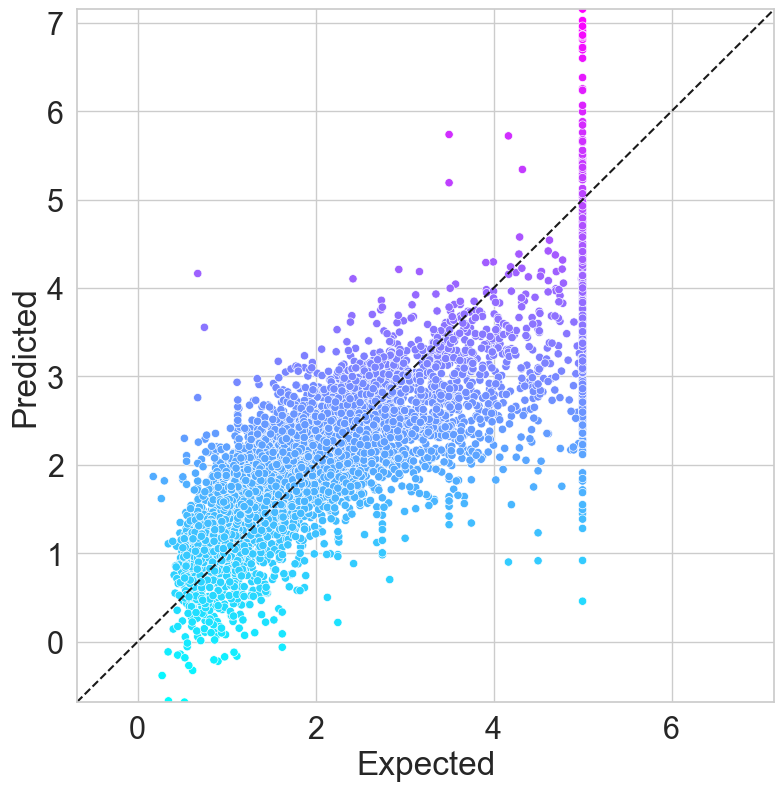

In [23]:
df = pd.DataFrame({'Expected': pd.Series(expected), 'Predicted': pd.Series(predicted)})
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
                       hue='Predicted', palette='cool', legend=False)
plt.axis([start, end]*2)
line = plt.plot([start, end], [start, end], 'k--')

### Section 8 - Regression Model Metrics

In [26]:
from sklearn import metrics
print(f'R-sqr: {metrics.r2_score(expected, predicted):.5f}')
print(f'MSE: {metrics.mean_squared_error(expected, predicted):.5f}')
      

R-sqr: 0.60090
MSE: 0.53501


### Section 9 - Best Model

In [25]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Bayesian Ridge': BayesianRidge(),
    'Lars': Lars(),
    'LassoLars': LassoLars()
}

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
        X=california.data, y=california.target, cv=kfold,
        scoring='r2')
    print(f'{estimator_name:>16}: mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599
  Bayesian Ridge: mean of r2 scores=0.599
            Lars: mean of r2 scores=0.563
       LassoLars: mean of r2 scores=0.285
